<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/tf2/nn-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create your first high level TensorFlow Model

In [0]:
!pip install -q tf-nightly-gpu-2.0-preview

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-dev20190512


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [4]:
!curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26783  100 26783    0     0   196k      0 --:--:-- --:--:-- --:--:--  196k


In [5]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
y = df['group']
df.drop('group', axis='columns', inplace=True)
X = df.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


## Input data now is in X, labels are in y

In [6]:
df.head()

,speed,age,miles
0,98.0,44.0,25.0
1,118.0,54.0,24.0
2,111.0,26.0,34.0
3,97.0,25.0,10.0
4,114.0,38.0,22.0


In [7]:
X.shape

(1500, 3)

In [8]:
y.head()

0    1
1    1
2    0
3    2
4    1
Name: group, dtype: int64

In [9]:
y.shape

(1500,)

## Create your model here

In [0]:
from tensorflow.keras.layers import Dense

In [0]:
# getting help
Dense?

In [12]:
# this is broken, fix

model = keras.Sequential()

model.add(Dense(name='hidden1', units=??, activation=??, input_dim=3))

# how many hidden layers?
model.add(Dense(name='output', units=??, activation=??))
# model.add(Dense(name='output', units=??, activation=??))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 50)                200       
_________________________________________________________________
output (Dense)               (None, 3)                 153       
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit?

In [17]:
%%time 

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

EPOCHS = 500

history = model.fit(X, y, epochs=EPOCHS, batch_size=2000, verbose=0)

CPU times: user 2.04 s, sys: 140 ms, total: 2.18 s
Wall time: 1.83 s


In [18]:
train_loss, train_accuracy = model.evaluate(X, y)
train_accuracy

1500/1500 [==============================] - 0s 70us/sample - loss: 0.7322 - accuracy: 0.6793


0.6793333

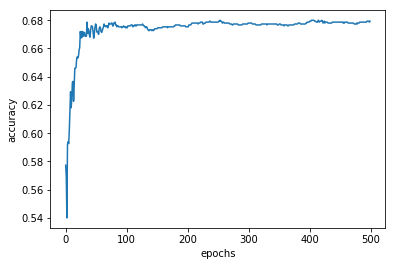

In [19]:
# plt.yscale('log')
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.plot(history.history['accuracy'])

In [20]:
model.predict(np.array([[100, 48, 10]]))

array([[0.26641512, 0.60835946, 0.12522537]], dtype=float32)